In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Lets look at an image from each type
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input/Kather_texture_2016_image_tiles_5000_png'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# look at notebook data with png
directory = '/kaggle/input/colorectal-histology-pngs/Kather_texture_2016_image_tiles_5000_png'
for dirname, _, filenames in os.walk(directory):
    print(dirname , _, filenames[:2])



/kaggle/input/colorectal-histology-pngs/Kather_texture_2016_image_tiles_5000_png ['04_LYMPHO', '05_DEBRIS', '01_TUMOR', '08_EMPTY', '06_MUCOSA', '02_STROMA', '03_COMPLEX', '07_ADIPOSE'] []
/kaggle/input/colorectal-histology-pngs/Kather_texture_2016_image_tiles_5000_png/04_LYMPHO [] ['105DB_CRC-Prim-HE-02_copy.tif_Row_1_Col_601.png', '119C5_CRC-Prim-HE-08_011.tif_Row_301_Col_151.png']
/kaggle/input/colorectal-histology-pngs/Kather_texture_2016_image_tiles_5000_png/05_DEBRIS [] ['15068_CRC-Prim-HE-08_021.tif_Row_1201_Col_751.png', '5FB2_CRC-Prim-HE-07_002.tif_Row_901_Col_151.png']
/kaggle/input/colorectal-histology-pngs/Kather_texture_2016_image_tiles_5000_png/01_TUMOR [] ['1669F_CRC-Prim-HE-04_033.tif_Row_151_Col_1.png', '129E9_CRC-Prim-HE-04_033.tif_Row_1_Col_151.png']
/kaggle/input/colorectal-histology-pngs/Kather_texture_2016_image_tiles_5000_png/08_EMPTY [] ['1130D_CRC-Prim-HE-06_005.tif_Row_4201_Col_3901.png', '136D1_CRC-Prim-HE-06_005.tif_Row_2551_Col_5251.png']
/kaggle/input/colo

In [3]:
# Convert Images to PNG'
# import shutil

if False:
    save_root = '/kaggle/working/Kather_texture_2016_image_tiles_5000_png'
    print(os.listdir('/kaggle/working'))

    # Make directory for PNGs
    if os.path.isdir(save_root):
        shutil.rmtree(save_root)
        os.mkdir(save_root)
    else:
        print('making')
        os.mkdir(save_root)
        print(os.listdir('/kaggle/working'))

    i = 0
    for root_dir, dirnames, filenames in os.walk(directory):
        if filenames:
            tissue = root_dir.split('/')[-1]

            for file in filenames:
                path = os.path.join(root_dir, file)
                save_dir = os.path.join(save_root,
                                     root_dir.split('/')[-1])

                if not os.path.isdir(save_dir):
                    os.mkdir(save_dir)

                save_path = os.path.join(save_dir,
                                     file[:-3]+'png')

                im = Image.open(path)
                im.save(save_path)
               

In [4]:
# Lets take a look at the data
tissue_im_p = {}
i = 0
for root_dir, dirnames, filenames in os.walk(directory):
#     print(f'**** {root_dir}')
    if i == 0:
        print('Tissue Types \t Sample Count')
        
    else:
        tissue_im_p[root_dir.split('/')[-1][3:]] = [os.path.join(root_dir, filenames[k]) for k in range(len(filenames))]
        print(f"{root_dir.split('/')[-1][3:]}\t", len(filenames))
    i += 1
    print('________________________________')

Tissue Types 	 Sample Count
________________________________
LYMPHO	 625
________________________________
DEBRIS	 625
________________________________
TUMOR	 625
________________________________
EMPTY	 625
________________________________
MUCOSA	 625
________________________________
STROMA	 625
________________________________
COMPLEX	 625
________________________________
ADIPOSE	 625
________________________________


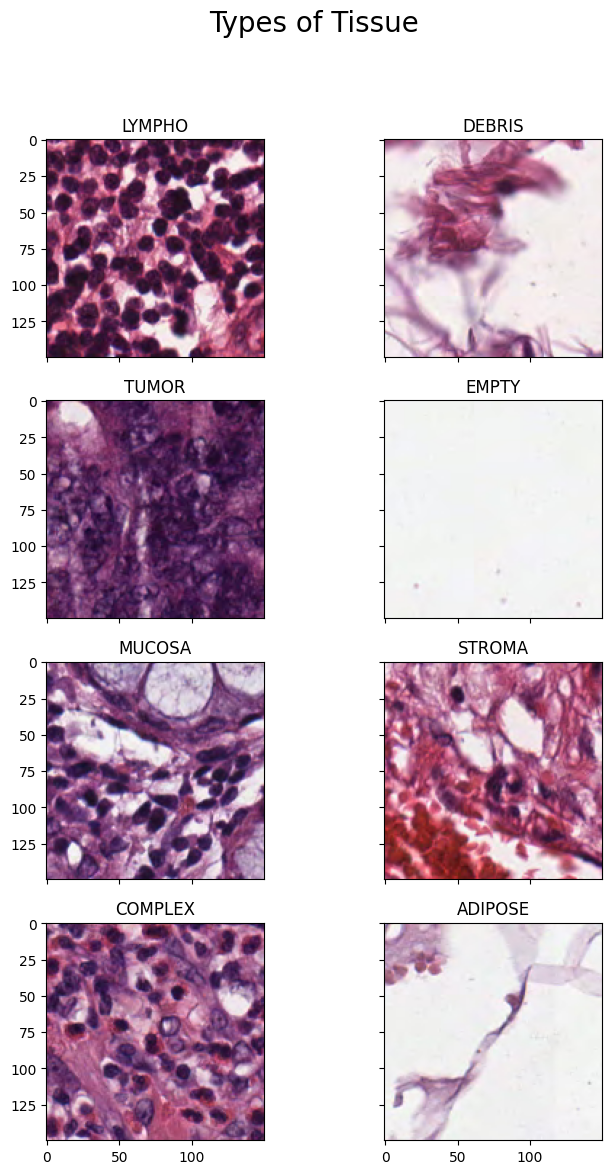

In [5]:
# Lets look at an image from each type
rows = 4
cols = 2
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(8, 13))
fig.suptitle('Types of Tissue', fontsize = 20.0)

for j, tissue in enumerate(tissue_im_p):
#     print(j, j//cols, j%cols)
    ax = axs[j//cols][j%cols]
    ax.set_title(tissue)
    img = np.asarray(Image.open(tissue_im_p[tissue][np.random.randint(0,len(tissue_im_p[tissue]))]))
    ax.imshow(img)
#     print(np.max(img), np.min(img))

plt.savefig('/kaggle/working/TissueExamples_png_conversion.png')

In [6]:
# Img Size
print(f'image size: {Image.open(tissue_im_p[list(tissue_im_p.keys())[0]][0]).size}')

image size: (150, 150)


In [7]:
# # Build data pipeline via tensorflow
import tensorflow as tf

batch_size = 32
img_height = 150
img_width = 150
input_shape = (img_height, img_width, 3)

print(os.listdir(directory))

train_ds = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels='inferred')

2024-06-06 00:31:22.983274: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 00:31:22.983325: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 00:31:22.984714: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


['04_LYMPHO', '05_DEBRIS', '01_TUMOR', '08_EMPTY', '06_MUCOSA', '02_STROMA', '03_COMPLEX', '07_ADIPOSE']
Found 5000 files belonging to 8 classes.
Using 4000 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5000 files belonging to 8 classes.
Using 1000 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['01_TUMOR', '02_STROMA', '03_COMPLEX', '04_LYMPHO', '05_DEBRIS', '06_MUCOSA', '07_ADIPOSE', '08_EMPTY']


In [10]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 150, 150, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [13]:
num_classes = len(class_names)
#https://www.tensorflow.org/tutorials/images/classification

In [14]:
from tensorflow.keras.initializers import RandomUniform as random_uniform
from tensorflow.keras.initializers import GlorotUniform as glorot_uniform
from tensorflow.keras.layers import Input, ZeroPadding2D, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import Activation, MaxPooling2D, Add, AveragePooling2D, Flatten
from tensorflow.keras import Model
def identity_block(X, f, filters, training=True, initializer=random_uniform, l2_v=0.1, dr_rate=0.1):

    
    # Retrieve Filters
    F1, F2, F3 = filters
#     print(f'Layer sizes are {F1}, {F2}, and {F3}')
#     print(f'Input shape is {X.shape}')
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = 1, strides = (1,1), padding = 'valid', kernel_initializer = initializer(seed=0),
              kernel_regularizer=tf.keras.regularizers.l2(l2_v))(X)
    X = BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = Activation('relu')(X)
    X = tf.keras.layers.Dropout(dr_rate)(X)
    
    ### START CODE HERE
    ## Second component of main path (≈3 lines)
    ## Set the padding = 'same'
    X = Conv2D(filters = F2, kernel_size = f, strides = (1,1), padding = 'same', kernel_initializer = initializer(seed=0),
              kernel_regularizer=tf.keras.regularizers.l2(l2_v))(X)
    X = BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = Activation('relu')(X)
    X = tf.keras.layers.Dropout(dr_rate)(X)

    ## Third component of main path (≈2 lines)
    ## Set the padding = 'valid'
    X = Conv2D(filters = F3, kernel_size = 1, strides = (1,1), padding = 'valid', kernel_initializer = initializer(seed=0),
              kernel_regularizer=tf.keras.regularizers.l2(l2_v))(X)
    X = BatchNormalization(axis = 3)(X, training = training) # Default axis
   
    
    ## Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = Activation('relu')(X)
    X = tf.keras.layers.Dropout(dr_rate)(X)
    ### END CODE HERE

    return X


def convolutional_block(X, f, filters, s = 2, training=True, initializer=glorot_uniform, l2_v=0.1, dr_rate = 0.1):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    s -- Integer, specifying the stride to be used
    training -- True: Behave in training mode
                False: Behave in inference mode
    initializer -- to set up the initial weights of a layer. Equals to Glorot uniform initializer, 
                   also called Xavier uniform initializer.
    
    Returns:
    X -- output of the convolutional block, tensor of shape (m, n_H, n_W, n_C)
    """
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    
    # First component of main path glorot_uniform(seed=0)
    X = Conv2D(filters = F1, kernel_size = 1, strides = (s, s), padding='valid', kernel_initializer = initializer(seed=0),
              kernel_regularizer=tf.keras.regularizers.l2(l2_v))(X)
    X = BatchNormalization(axis = 3)(X, training=training)
    X = Activation('relu')(X)
    X = tf.keras.layers.Dropout(dr_rate)(X)

    ### START CODE HERE
    
    ## Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = f, strides = 1, padding='same', kernel_initializer = initializer(seed=0),
              kernel_regularizer=tf.keras.regularizers.l2(l2_v))(X)
    X = BatchNormalization(axis = 3)(X, training=training)
    X = Activation('relu')(X)
    X = tf.keras.layers.Dropout(dr_rate)(X)

    ## Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = 1, strides = 1, padding='valid', kernel_initializer = initializer(seed=0),
              kernel_regularizer=tf.keras.regularizers.l2(l2_v))(X)
    
    ##### SHORTCUT PATH ##### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = 1, strides = (s, s), padding='valid', kernel_initializer = initializer(seed=0),
                       kernel_regularizer=tf.keras.regularizers.l2(l2_v))(X_shortcut)
    
    ### END CODE HERE

    # Final step: Add shortcut value to main path (Use this order [X, X_shortcut]), and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = BatchNormalization(axis = 3)(X, training=training)
    X = Activation('relu')(X)
    X = tf.keras.layers.Dropout(dr_rate)(X)
    
    return X

# Random Brightness Layers

In [15]:
def random_brightness_img(image, max_delta):
    return tf.clip_by_value(tf.image.random_brightness(image, max_delta), 0, 1)
    

def random_brightness(max_delta=0.4):
    return layers.Lambda(lambda x: random_brightness_img(x, max_delta))

random_brightness_layer = random_brightness()

08_EMPTY


/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


tf.Tensor(0.7047613, shape=(), dtype=float32)
tf.Tensor(0.977926, shape=(), dtype=float32)
tf.Tensor(0.9079407, shape=(), dtype=float32)
tf.Tensor(0.6317652, shape=(), dtype=float32)
tf.Tensor(0.9110258, shape=(), dtype=float32)
tf.Tensor(0.85664016, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.9769829, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


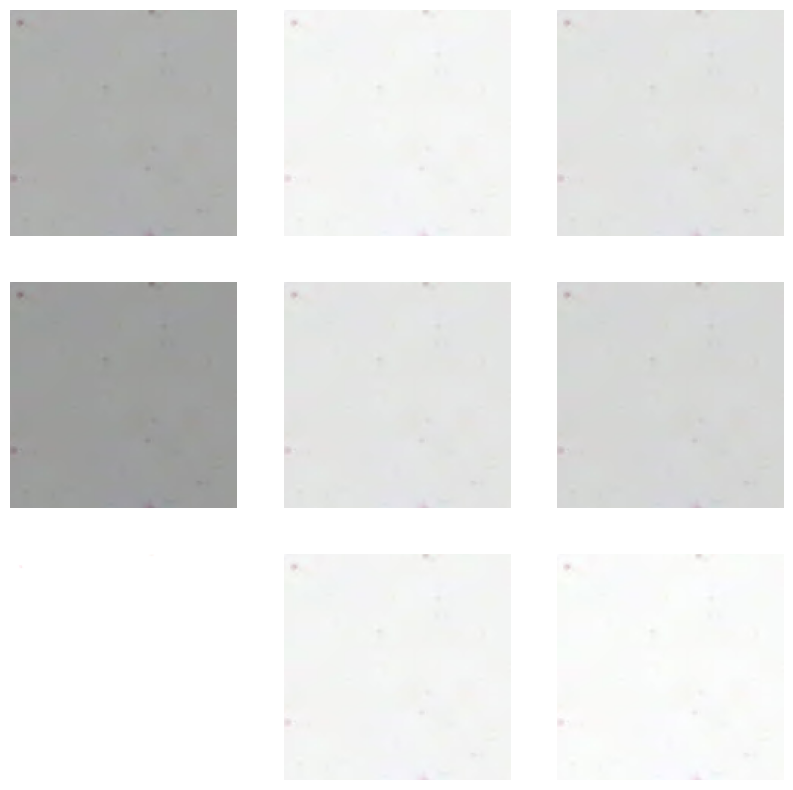

In [16]:
# go through a batch
# rescale an image analogous to network
# inspect the effects of random_brightness() layer
for image, labels in train_ds.take(1):
    print(class_names[labels[0]])
    plt.figure(figsize=(10, 10))
    image = layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))(image)
    
    for i in range(9):
        augmented_image = random_brightness_layer(image[0])
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow((augmented_image*255).numpy().astype("uint8"), vmin=0, vmax=1)
        plt.axis("off")
        print(tf.math.reduce_max(augmented_image[0]))

In [17]:
# set up data augmentation pipeline
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom((0.1, 0.2), fill_mode='nearest')
    #random_brightness()
    
  ]
)

In [18]:
def ResNet_small(input_shape = (64, 64, 3), classes = 6, l2_v=0.1, dr_rate = 0.1, dense_dr_rate = 0.5):
    """
    Stage-wise implementation of the architecture of the popular ResNet50:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> FLATTEN -> DENSE 

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes
    l2_v -- l2 regularization parameter
    dr_rate -- dropout rate

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Rescale
    X = layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))(X_input)
    
    # data augmentation pipeline
    X = data_augmentation(X)
    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0), kernel_regularizer=tf.keras.regularizers.l2(l2_v))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = tf.keras.layers.Dropout(dr_rate)(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1, l2_v=l2_v)
    X = identity_block(X, 3, [64, 64, 256], l2_v=l2_v)
    X = identity_block(X, 3, [64, 64, 256], l2_v=l2_v)

    ## AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D(pool_size=(2, 2),
                        strides=(1, 1), padding='valid')(X)

    # output layer
    
    X = Flatten()(X)
    X = tf.keras.layers.Dropout(dense_dr_rate)(X)
    X = Dense(128, activation='relu', kernel_initializer = glorot_uniform(seed=0), kernel_regularizer=tf.keras.regularizers.l2(l2_v))(X)
    X = tf.keras.layers.Dropout(dense_dr_rate)(X)
    X = Dense(32, activation='relu', kernel_initializer = glorot_uniform(seed=0), kernel_regularizer=tf.keras.regularizers.l2(l2_v))(X)
    X = tf.keras.layers.Dropout(dense_dr_rate)(X)
    X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0), kernel_regularizer=tf.keras.regularizers.l2(l2_v))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X)

    return model

In [19]:
model = ResNet_small(input_shape = input_shape, classes=num_classes, l2_v=0.001,  dr_rate = 0.1, dense_dr_rate = 0.1)
# model.summary()

In [20]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [21]:
initial_learning_rate = 0.00001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=3750,
    decay_rate=0.99,
    staircase=True)

In [22]:
epochs=60
# model = ResNet50(input_shape = input_shape, classes=num_classes, l2_v=0.0001)
histories = []
def run_fit(initial_learning_rates):
    
    for initial_learning_rate in initial_learning_rates:
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate,
            decay_steps=3750,
            decay_rate=0.99,
            staircase=True)

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                      metrics=['accuracy'])

        history = model.fit(
          train_ds,
          validation_data=val_ds,
          epochs=epochs
        )

        histories.append(history)
        
    return histories

histories = run_fit([0.001, 0.0001, 0.0001, 1e-5, 1e-6, 1e-7])

Epoch 1/60


2024-06-06 00:31:42.396238: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_2_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.1402 - loss: 36.5889 - val_accuracy: 0.1000 - val_loss: 3.8077
Epoch 2/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.1196 - loss: 4.0745 - val_accuracy: 0.1000 - val_loss: 3.5267
Epoch 3/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.1306 - loss: 3.6107 - val_accuracy: 0.1000 - val_loss: 3.3024
Epoch 4/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.1431 - loss: 3.3046 - val_accuracy: 0.1350 - val_loss: 3.0670
Epoch 5/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.2086 - loss: 3.0202 - val_accuracy: 0.1670 - val_loss: 2.8520
Epoch 6/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.2105 - loss: 2.8746 - val_accuracy: 0.2090 - val_loss: 2.6207
Epoch 7/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.2234 - loss: 2.6793 - val_accuracy: 0.2360 - val_loss: 2.5398
Epoch 8/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.2136 - loss: 2.5899 - val_accuracy: 0.2

2024-06-06 00:41:19.419576: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_2_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - accuracy: 0.7737 - loss: 0.7968 - val_accuracy: 0.4450 - val_loss: 3.6178
Epoch 2/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.7870 - loss: 0.7509 - val_accuracy: 0.5820 - val_loss: 1.8939
Epoch 3/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.7955 - loss: 0.6756 - val_accuracy: 0.5350 - val_loss: 3.2124
Epoch 4/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.8031 - loss: 0.6857 - val_accuracy: 0.6240 - val_loss: 2.6117
Epoch 5/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.8219 - loss: 0.6461 - val_accuracy: 0.5560 - val_loss: 4.9072
Epoch 6/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.8264 - loss: 0.6338 - val_accuracy: 0.6160 - val_loss: 6.1269
Epoch 7/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.8165 - loss: 0.6322 - val_accuracy: 0.7160 - val_loss: 1.1431
Epoch 8/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.8351 - loss: 0.6057 - val_accuracy: 0.71

2024-06-06 00:50:46.591048: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_2_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - accuracy: 0.9451 - loss: 0.2904 - val_accuracy: 0.8910 - val_loss: 0.4976
Epoch 2/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9392 - loss: 0.2975 - val_accuracy: 0.6600 - val_loss: 2.3883
Epoch 3/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9432 - loss: 0.2939 - val_accuracy: 0.8340 - val_loss: 0.6603
Epoch 4/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9375 - loss: 0.2983 - val_accuracy: 0.7950 - val_loss: 0.7826
Epoch 5/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9495 - loss: 0.2777 - val_accuracy: 0.6600 - val_loss: 2.8286
Epoch 6/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9489 - loss: 0.2659 - val_accuracy: 0.7380 - val_loss: 1.1660
Epoch 7/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9500 - loss: 0.2810 - val_accuracy: 0.7440 - val_loss: 0.9342
Epoch 8/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9415 - loss: 0.2887 - val_accuracy: 0.82

2024-06-06 01:00:14.779045: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_2_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9689 - loss: 0.2085 - val_accuracy: 0.8670 - val_loss: 0.5472
Epoch 2/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9729 - loss: 0.1999 - val_accuracy: 0.8630 - val_loss: 0.5473
Epoch 3/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9761 - loss: 0.1855 - val_accuracy: 0.8630 - val_loss: 0.5418
Epoch 4/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9780 - loss: 0.1864 - val_accuracy: 0.8510 - val_loss: 0.5952
Epoch 5/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9772 - loss: 0.1880 - val_accuracy: 0.8370 - val_loss: 0.5956
Epoch 6/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9791 - loss: 0.1802 - val_accuracy: 0.8150 - val_loss: 0.7092
Epoch 7/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9794 - loss: 0.1687 - val_accuracy: 0.8560 - val_loss: 0.5535
Epoch 8/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9789 - loss: 0.1726 - val_accuracy: 0.84

2024-06-06 01:09:44.690615: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_2_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - accuracy: 0.9818 - loss: 0.1542 - val_accuracy: 0.8240 - val_loss: 0.7032
Epoch 2/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9841 - loss: 0.1516 - val_accuracy: 0.8310 - val_loss: 0.6869
Epoch 3/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9828 - loss: 0.1454 - val_accuracy: 0.8340 - val_loss: 0.6885
Epoch 4/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9903 - loss: 0.1368 - val_accuracy: 0.8300 - val_loss: 0.6877
Epoch 5/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9816 - loss: 0.1446 - val_accuracy: 0.8320 - val_loss: 0.6878
Epoch 6/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9901 - loss: 0.1333 - val_accuracy: 0.8320 - val_loss: 0.6855
Epoch 7/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9871 - loss: 0.1371 - val_accuracy: 0.8230 - val_loss: 0.7021
Epoch 8/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9853 - loss: 0.1388 - val_accuracy: 0.82

2024-06-06 01:19:16.674199: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_2_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9840 - loss: 0.1413 - val_accuracy: 0.8240 - val_loss: 0.7195
Epoch 2/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9855 - loss: 0.1409 - val_accuracy: 0.8230 - val_loss: 0.7230
Epoch 3/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9854 - loss: 0.1386 - val_accuracy: 0.8230 - val_loss: 0.7241
Epoch 4/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9829 - loss: 0.1377 - val_accuracy: 0.8230 - val_loss: 0.7285
Epoch 5/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9813 - loss: 0.1451 - val_accuracy: 0.8230 - val_loss: 0.7324
Epoch 6/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9825 - loss: 0.1441 - val_accuracy: 0.8240 - val_loss: 0.7197
Epoch 7/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9860 - loss: 0.1356 - val_accuracy: 0.8240 - val_loss: 0.7227
Epoch 8/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9854 - loss: 0.1368 - val_accuracy: 0.82

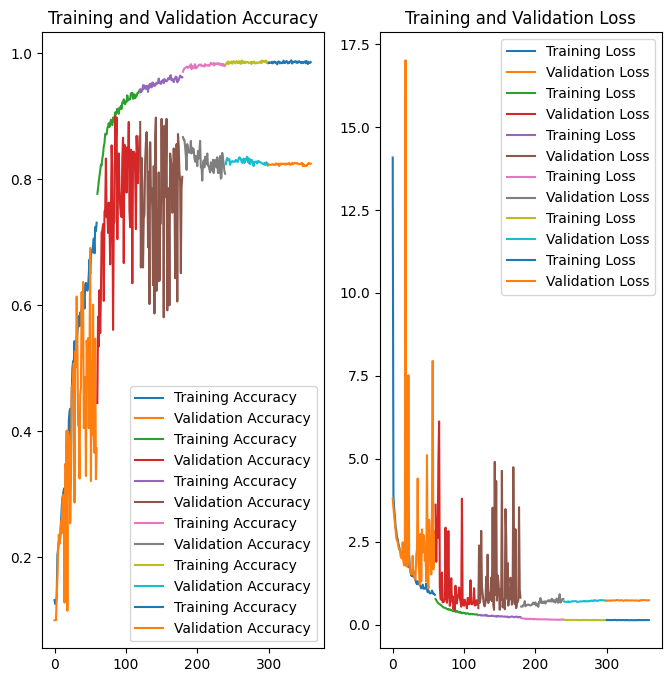

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [23]:
def plot_history(histories, ax1=None, ax2=None):
    epochs_prev = 0
    
    for history in histories:
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']

        loss = history.history['loss']
        val_loss = history.history['val_loss']
        
        step_epochs = history.params['epochs']
        epochs_range = range(epochs_prev, step_epochs + epochs_prev)
        epochs_prev += step_epochs

        plt.figure(figsize=(8, 8))
        if ax1 is None:
            ax1 = plt.subplot(1, 2,1)
        ax1.plot(epochs_range, acc, label='Training Accuracy')
        ax1.plot(epochs_range, val_acc, label='Validation Accuracy')
        ax1.legend(loc='lower right')
        ax1.set_title('Training and Validation Accuracy')
        if ax2 is None:
            ax2 = plt.subplot(1, 2, 2)
        ax2.plot(epochs_range, loss, label='Training Loss')
        ax2.plot(epochs_range, val_loss, label='Validation Loss')
        ax2.legend(loc='upper right')
        ax2.set_title('Training and Validation Loss')
    plt.show()
    
    return ax1, ax2


ax1, ax2 = plot_history(histories=histories)

In [24]:
predictions = model.predict(val_ds)
predictions = np.argmax(predictions, axis=1)
val_label = np.concatenate([y for x, y in val_ds], axis=0) 
accuracy = sum(val_label==predictions)/len(val_label)
accuracy

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


0.825

(150, 150, 3) float32 43.0 255.0
(150, 150, 3) float32 0.0 255.0
(150, 150, 3) float32 26.0 255.0
(150, 150, 3) float32 34.0 255.0
(150, 150, 3) float32 2.0 255.0
(150, 150, 3) float32 3.0 255.0
(150, 150, 3) float32 0.0 255.0
(150, 150, 3) float32 53.0 255.0
8


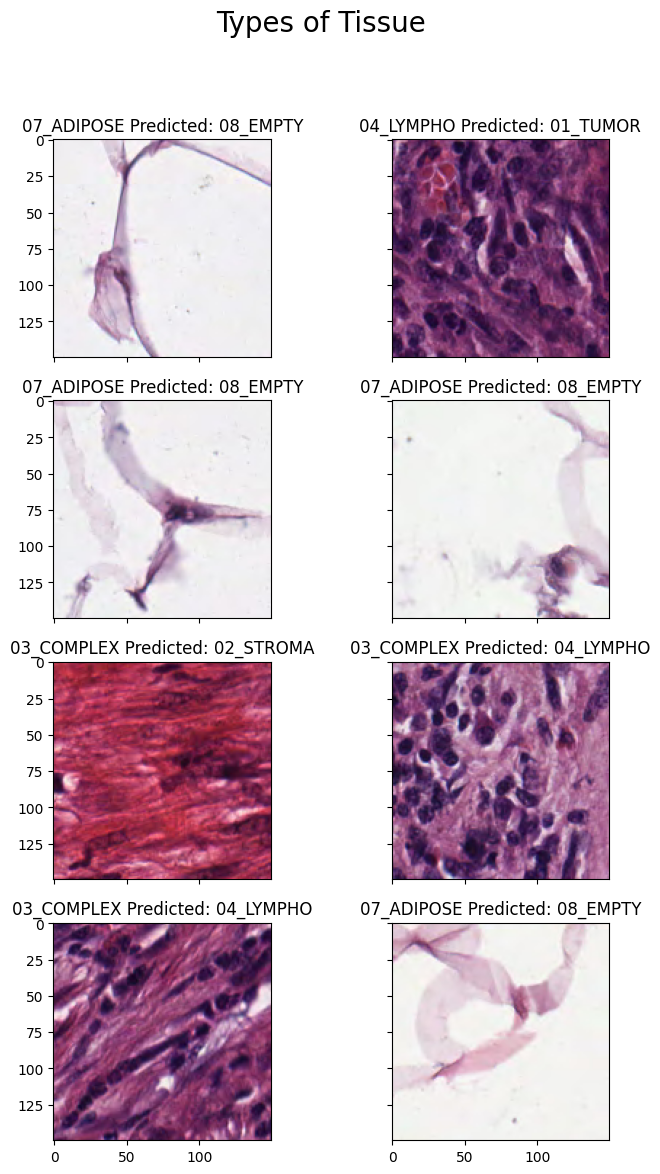

In [25]:
# show bad images
val_images = np.concatenate([x for x, y in val_ds], axis=0) 
mask = (val_label==predictions)

not_count = 0

rows = 4
cols = 2
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(8, 13))
fig.suptitle('Types of Tissue', fontsize = 20.0)


for i, image in enumerate(val_images):
    if not mask[i]:
        
        print(image.shape, image.dtype, np.min(image), np.max(image))

        ax = axs[not_count//cols][not_count%cols]
        ax.set_title(class_names[val_label[i]] + ' Predicted: ' + class_names[predictions[i]])
        ax.imshow(image.astype('uint8'))
        
        not_count += 1
        if not_count == 8:
            break
            
            
        

print(not_count)

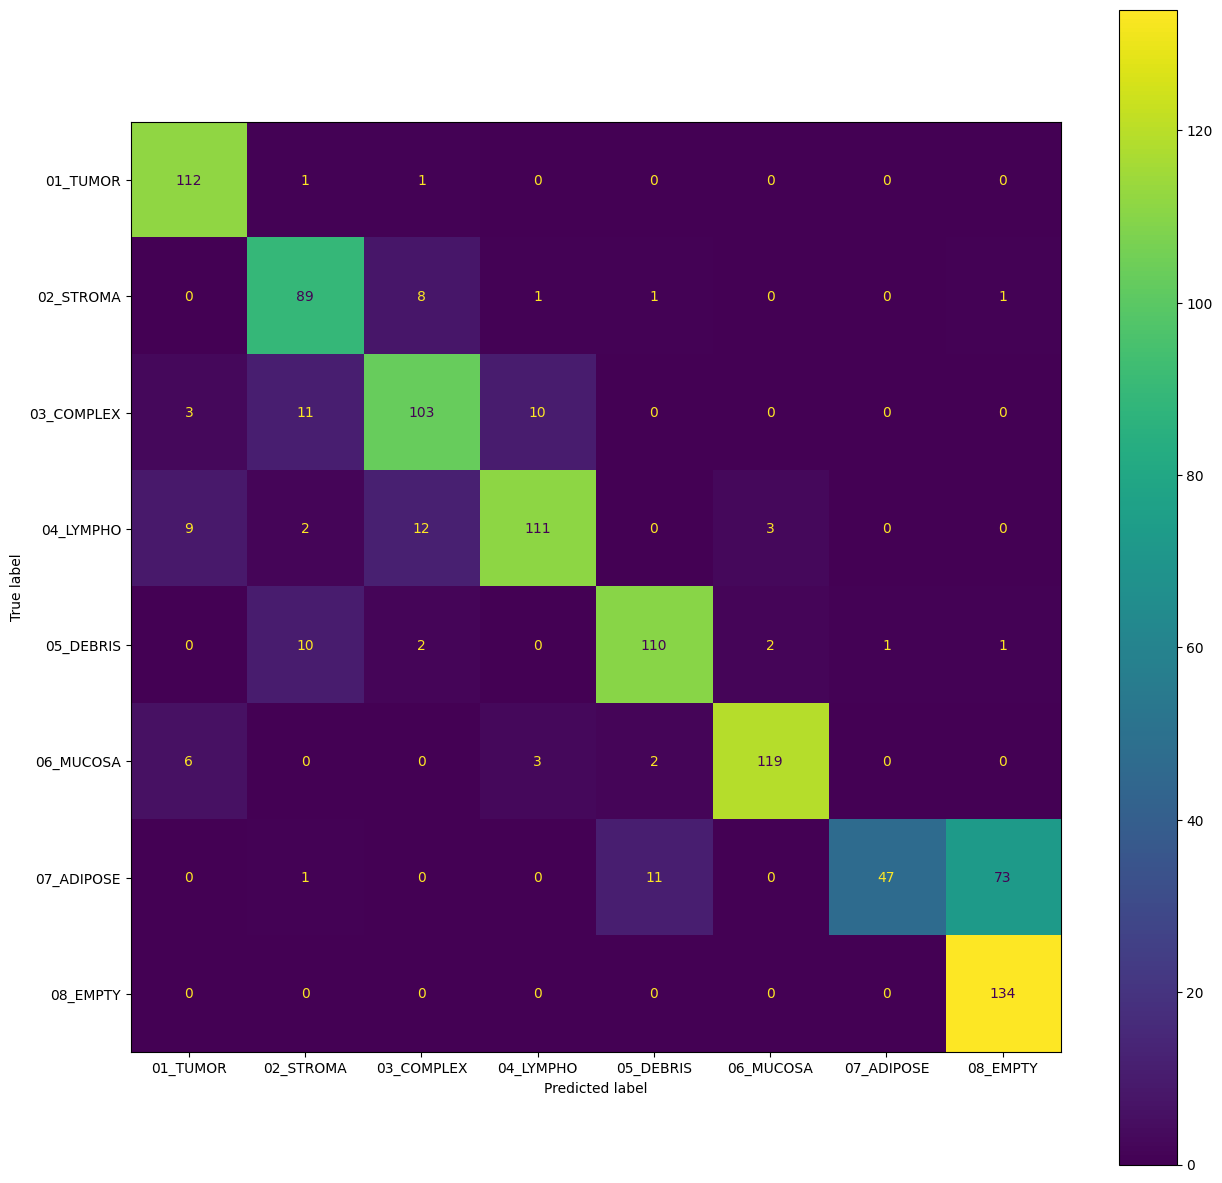

In [26]:
tf.math.confusion_matrix(
    val_label,
    predictions,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(15, 15))
ax = plt.axes()
ConfusionMatrixDisplay.from_predictions(val_label, predictions,display_labels=class_names, ax=ax)

In [27]:
class_ = 0
mask = (val_label[val_label==class_] == predictions[val_label==class_])
total_class_predicted = predictions == class_

predicted_correctly = sum(mask) # total predicted correctly
total_predicted = sum(total_class_predicted) # total of predictions in class
total_in_class = len(mask)

recall = predicted_correctly/total_in_class
accuracy = predicted_correctly/total_predicted

# len mask is how many of the validation set match the class
# sum mask is how many of the validation set were correctly predicted
print(f'Total {class_names[class_]}: {len(mask)} \n')
print(f'Total {class_names[class_]} predicted: {total_predicted}\n{class_names[class_]} Predicted Correctly: {predicted_correctly}\n')
print(f'Recall: {recall}\nAccuracy: {accuracy}')



Total 01_TUMOR: 114 

Total 01_TUMOR predicted: 130
01_TUMOR Predicted Correctly: 112

Recall: 0.9824561403508771
Accuracy: 0.8615384615384616


In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
import numpy as np

# Assuming val_label and predictions are your ground truth and predicted labels respectively
class_ = 0  # Adjust this as needed
mask = (val_label[val_label == class_] == predictions[val_label == class_])
total_class_predicted = predictions == class_

predicted_correctly = sum(mask)  # total predicted correctly
total_predicted = sum(total_class_predicted)  # total of predictions in class
total_in_class = len(mask)

recall = predicted_correctly / total_in_class
accuracy = predicted_correctly / total_predicted

# Print class-specific metrics
print(f'Total {class_names[class_]}: {total_in_class} \n')
print(f'Total {class_names[class_]} predicted: {total_predicted}\n{class_names[class_]} Predicted Correctly: {predicted_correctly}\n')
print(f'Recall: {recall}\nAccuracy: {accuracy}')

# Calculate confusion matrix for multiclass
conf_matrix = confusion_matrix(val_label, predictions)

# Extract TN, FP, FN, TP for the specific class
tp = conf_matrix[class_, class_]
fp = conf_matrix[:, class_].sum() - tp
fn = conf_matrix[class_, :].sum() - tp
tn = conf_matrix.sum() - (tp + fp + fn)

specificity = tn / (tn + fp)
precision = tp / (tp + fp)
# Use macro averaging for F1-Score in multiclass setting
f1 = f1_score(val_label, predictions, average='macro')
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)
matthews_corr = matthews_corrcoef(val_label, predictions)
kappa = cohen_kappa_score(val_label, predictions)

# Calculate G-Mean
g_mean = np.sqrt(recall * specificity)

# Display all metrics
print(f'Specificity: {specificity}')
print(f'Precision: {precision}')
print(f'F1-Score: {f1}')
print(f'False Positive Rate: {false_positive_rate}')
print(f'False Negative Rate: {false_negative_rate}')
print(f'Matthews Correlation Coefficient: {matthews_corr}')
print(f'Kappa: {kappa}')
print(f'G-Mean: {g_mean}')


Total 01_TUMOR: 114 

Total 01_TUMOR predicted: 130
01_TUMOR Predicted Correctly: 112

Recall: 0.9824561403508771
Accuracy: 0.8615384615384616
Specificity: 0.9796839729119639
Precision: 0.8615384615384616
F1-Score: 0.8164921481520229
False Positive Rate: 0.020316027088036117
False Negative Rate: 0.017543859649122806
Matthews Correlation Coefficient: 0.8060577299908069
Kappa: 0.7999009795704617
G-Mean: 0.9810690774816528
